# World Wide Products Project

Submitted by Amin Shojaeighadikolaei.

- This Project is about time series forecasting. The dataset contains historical product demand for a manufacturing company with footprints globally. The project is dividing in 3 main part.

## Part 1: Import 
        - Importing libraries.
        - Importing dataset.
        - Cleaning Dataset.
       

## Part 2:  Data preparation

        - Exploratory data analysis
        - Datetime
        - Stationarity test
        
## Part 3: Forcasting methods
       - Autoreggresive AR model
       - ARIMA
       - SARIMA
       - Exponentialsmoothing

# Part 1

## Import libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams

## Import dataset

In [29]:

Historical_product = pd.read_csv('https://raw.githubusercontent.com/aminshojaei/world-wide-product/master/Historical%20Product%20Demand.csv')


## Clening dataset

- At first you can see the first 10 row of the dataset

In [30]:
Historical_product.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500
8,Product_0979,Whse_J,Category_028,2012/7/23,500
9,Product_0979,Whse_J,Category_028,2012/8/29,500


In [31]:
Historical_product.shape


(1048575, 5)

- Now I want to remove the NaN data to clean the dataset and you will see the number of the rows changed

In [32]:
Historical_product=Historical_product.dropna(how='any')
Historical_product.shape


(1037336, 5)

- Now we can see some quick summary of the dataset.It is shown that there are four central warehouses to ship products within the region it is responsible for. Since the products are manufactured in different locations all over the world. In addition, there are 2160 Unique product in 33 unique category.

In [33]:
Historical_product.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1037336,1037336,1037336,1037336,1037336
unique,2160,4,33,1729,3749
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,470266,2075,112263


In [34]:
x_vector=[]
for i in range(5):
    x=Historical_product.columns[i]
    x_vector.append(x)
    #print(Historical_product.columns[i].unique())

In [35]:
for i in range(len(x_vector)):
    x=len(Historical_product[x_vector[i]].unique())
    print('Number of unique '+x_vector[i]+' is: ',x)
    

Number of unique Product_Code is:  2160
Number of unique Warehouse is:  4
Number of unique Product_Category is:  33
Number of unique Date is:  1729
Number of unique Order_Demand is:  3749


# Part 2: Data preparation


   ## Exploratory data analysis
    

- Now I want to see which warehouse had more different order and different unique product.

Text(0, 0.5, 'frequency')

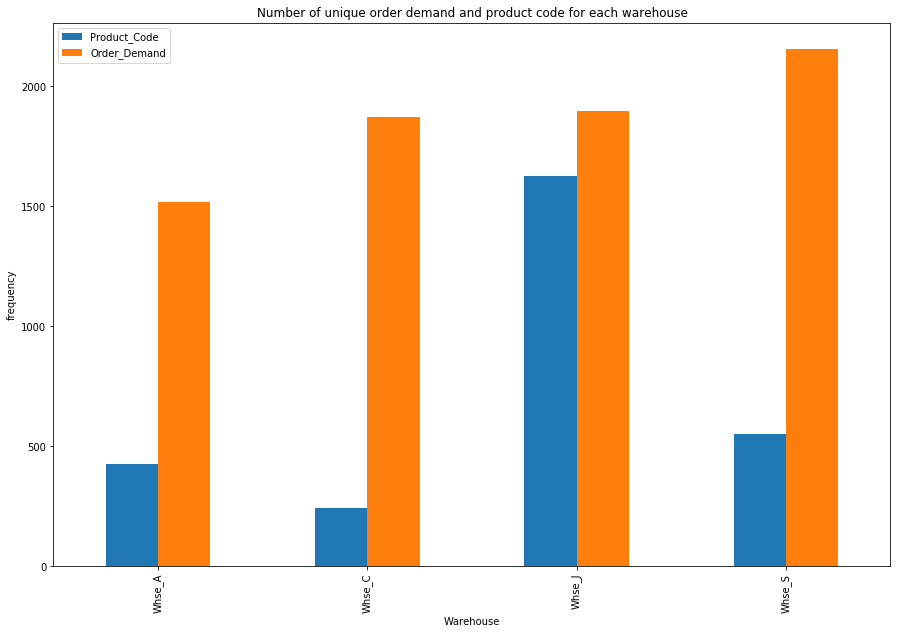

In [36]:
warehouse = Historical_product.groupby('Warehouse')['Product_Code','Order_Demand'].nunique().plot(kind='bar',
                                    figsize=(15,10),
                                    title="Number of unique order demand and product code for each warehouse")
warehouse.set_xlabel('Warehouse')
warehouse.set_ylabel('frequency')

 - The above bar chart shows that in the Warehouse "Whse-I", the variety of demanded products has been greater than the other warehouses. 
 - Now I want to know which category had the more variety order. For this, following code is provided:

Text(0, 0.5, 'Demand')

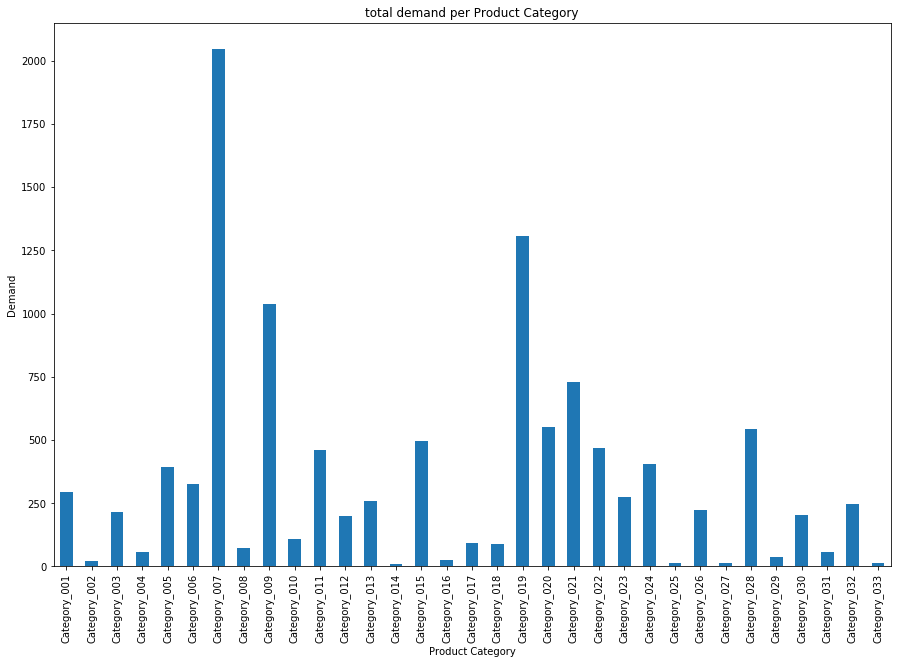

In [37]:
Product_category = Historical_product.groupby('Product_Category')['Order_Demand'].nunique().plot(kind='bar',
                                    figsize=(15,10),
                                    title="total demand per Product Category")
Product_category.set_xlabel('Product Category')
Product_category.set_ylabel('Demand')

- Now I want to find which product has more variety by date:

In [38]:
Historical_product.groupby('Product_Code')['Date'].nunique().sort_values(ascending=False).head()


Product_Code
Product_0349    1295
Product_0620    1288
Product_0033    1273
Product_1470    1269
Product_1241    1266
Name: Date, dtype: int64

- For forcastng to determine the demand for a particular product, I want to select Product_0349, because it's order has more variety than the other products(in more different days).

In [58]:
specific_product= Historical_product[Historical_product['Product_Code']=='Product_0349']
specific_product.shape

(4116, 5)

In [59]:
specific_product.reset_index(inplace=True)
specific_product.head()

,index,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,3268,Product_0349,Whse_S,Category_021,2012/5/20,36
1,3434,Product_0349,Whse_S,Category_021,2012/3/2,2
2,3436,Product_0349,Whse_S,Category_021,2012/3/6,2
3,3437,Product_0349,Whse_S,Category_021,2012/3/7,25
4,3441,Product_0349,Whse_S,Category_021,2012/3/14,30


- Now for computing on dataset, we need convert order demands to numeric values. For doing this, following code is provided:

In [60]:
specific_product['Order_Demand']=pd.to_numeric(specific_product['Order_Demand'],errors='coerce')
specific_product.head()

C:\Users\a335s717\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,3268,Product_0349,Whse_S,Category_021,2012/5/20,36.0
1,3434,Product_0349,Whse_S,Category_021,2012/3/2,2.0
2,3436,Product_0349,Whse_S,Category_021,2012/3/6,2.0
3,3437,Product_0349,Whse_S,Category_021,2012/3/7,25.0
4,3441,Product_0349,Whse_S,Category_021,2012/3/14,30.0


In [61]:
## This shows that this product had 31 times returning.
counter=0
for i in range(len(specific_product['Order_Demand'])):
    if specific_product['Order_Demand'][i]<=0:
        counter+=1
print(counter)

31


## Datetime

In [62]:
specific_product.Date[0]

'2012/5/20'

- If we look at on the date above, the date is string and it is not taken as a date and we need to take it as a date. Otherwise we can not do time series analysis. For this we need to import datetime linbrary from pandas. It shown with following code that the type of date is object and we have to cahnge it to datetime type.

In [63]:
specific_product.dtypes

index                 int64
Product_Code         object
Warehouse            object
Product_Category     object
Date                 object
Order_Demand        float64
dtype: object

- Now i want to convert Date type with following lambda function.

In [64]:
specific_product['Date']=specific_product['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y/%m/%d'))
specific_product.head()

C:\Users\a335s717\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,3268,Product_0349,Whse_S,Category_021,2012-05-20,36.0
1,3434,Product_0349,Whse_S,Category_021,2012-03-02,2.0
2,3436,Product_0349,Whse_S,Category_021,2012-03-06,2.0
3,3437,Product_0349,Whse_S,Category_021,2012-03-07,25.0
4,3441,Product_0349,Whse_S,Category_021,2012-03-14,30.0


In [65]:
specific_product.dtypes

index                        int64
Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand               float64
dtype: object

- Now you can see that the type of the Date column is datetime

In [66]:
specific_product.dropna(inplace=True)
specific_product.isnull().any()

C:\Users\a335s717\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


index               False
Product_Code        False
Warehouse           False
Product_Category    False
Date                False
Order_Demand        False
dtype: bool

In [67]:
specific_product.shape

(4091, 6)

- Now I want to sort dataset by Date column. and Then will make Date dolumn as index.

In [68]:
specific_product.sort_values(by='Date', inplace=True)
specific_product.head()

C:\Users\a335s717\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Product_Code,Warehouse,Product_Category,Date,Order_Demand
228,72509,Product_0349,Whse_C,Category_021,2011-12-26,100.0
282,73581,Product_0349,Whse_C,Category_021,2011-12-30,30.0
229,72510,Product_0349,Whse_C,Category_021,2012-01-03,200.0
747,199491,Product_0349,Whse_S,Category_021,2012-01-04,30.0
589,124568,Product_0349,Whse_A,Category_021,2012-01-04,20.0


In [69]:
specific_product.Date[0]

Timestamp('2012-05-20 00:00:00')

In [70]:
specific_product=specific_product.set_index('Date')

specific_product.head()

,index,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,,
2011-12-26,72509,Product_0349,Whse_C,Category_021,100.0
2011-12-30,73581,Product_0349,Whse_C,Category_021,30.0
2012-01-03,72510,Product_0349,Whse_C,Category_021,200.0
2012-01-04,199491,Product_0349,Whse_S,Category_021,30.0
2012-01-04,124568,Product_0349,Whse_A,Category_021,20.0


In [71]:
specific_product.index

DatetimeIndex(['2011-12-26', '2011-12-30', '2012-01-03', '2012-01-04',
               '2012-01-04', '2012-01-04', '2012-01-04', '2012-01-04',
               '2012-01-06', '2012-01-06',
               ...
               '2016-12-21', '2016-12-21', '2016-12-21', '2016-12-21',
               '2016-12-22', '2016-12-22', '2016-12-23', '2016-12-23',
               '2016-12-23', '2016-12-26'],
              dtype='datetime64[ns]', name='Date', length=4091, freq=None)

- Since I want to forecast the order demand , I just need Date and Order_Demand columns. So I will drop the other columns.

In [72]:
specific_product.drop(['index','Product_Code','Warehouse','Product_Category'],axis=1,inplace=True)
specific_product

,Order_Demand
Date,
2011-12-26,100.0
2011-12-30,30.0
2012-01-03,200.0
2012-01-04,30.0
2012-01-04,20.0
...,...
2016-12-22,50.0
2016-12-23,10.0
2016-12-23,6.0


- I want to forecast the Order demand for the specific product monthly. So at first I need to change the dataset to monthly.

In [73]:
xx=specific_product.resample('M').sum()
xx.size

61

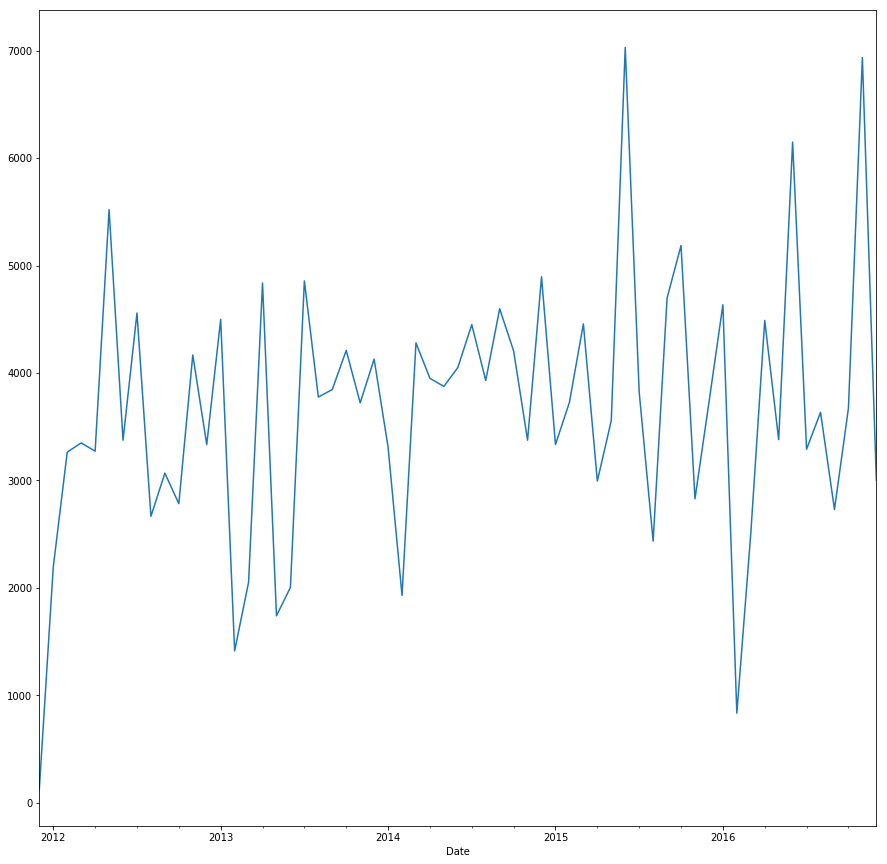

In [74]:
y=xx['Order_Demand']
y=y['2011-01-01':'2017-01-01']
y.plot(figsize=(15,15))

## Stationarity test

- A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.



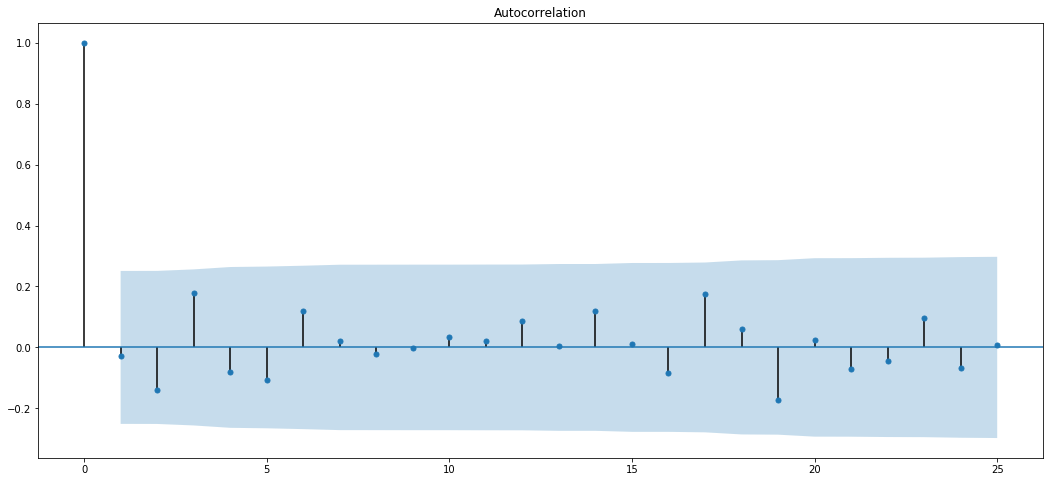

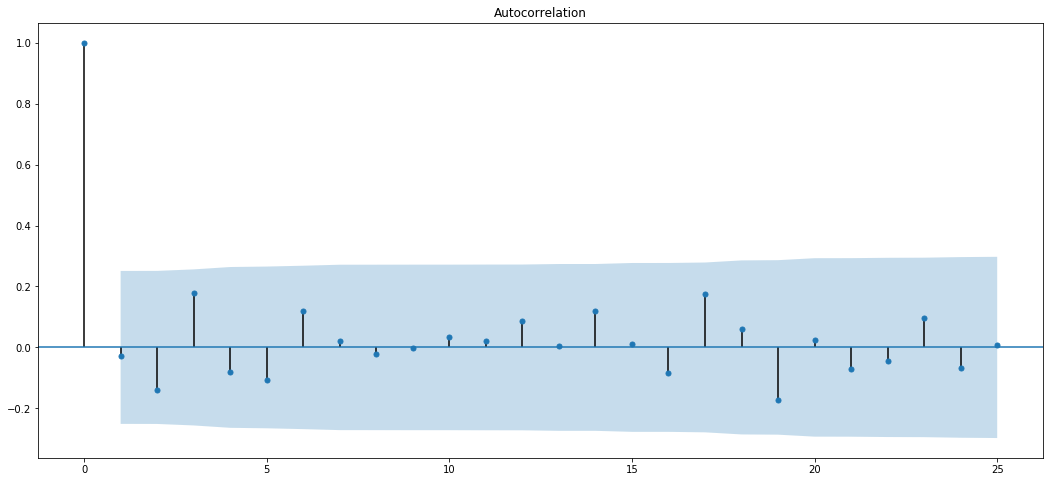

In [338]:
sm.graphics.tsa.plot_acf(xx["Order_Demand"],lags=25,title="Autocorrelation")
#plot_acf(xx)

In [114]:
from statsmodels.tsa.stattools import adfuller

station = xx["Order_Demand"].values
xx_stationary = adfuller(station)

print('ADF statistic: %f ' %xx_stationary[0] )
print('p-value: %f'% xx_stationary[1])
print('critical values:')

for key,value in xx_stationary[4].items():
    print('\t%s:%.3f'%(key,value))
if xx_stationary[0]< xx_stationary[4]["5%"]:
    print('is Stationary')
else:
    print('is not stationary')


ADF statistic: -4.502652 
p-value: 0.000194
critical values:
	1%:-3.548
	5%:-2.913
	10%:-2.594
is Stationary


- So the data is stationarity. In some cases dataset is not stationary. There are some approach to convert a non-stationary dataset to stationary dataset. One of them is following approach.

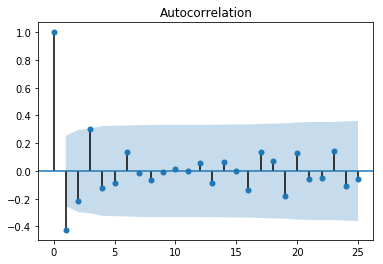

<Figure size 1440x720 with 0 Axes>

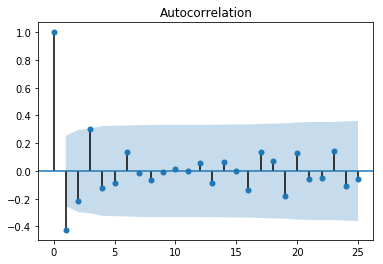

In [117]:

## integrated of order 1, demoted by d (for diff) , one of the parameter of ARIMA model
xx_diff = xx.diff(periods=1)
xx_diff= xx_diff[1:]
plt.figure(figsize=(20,10))
plot_acf(xx_diff, lags=25)

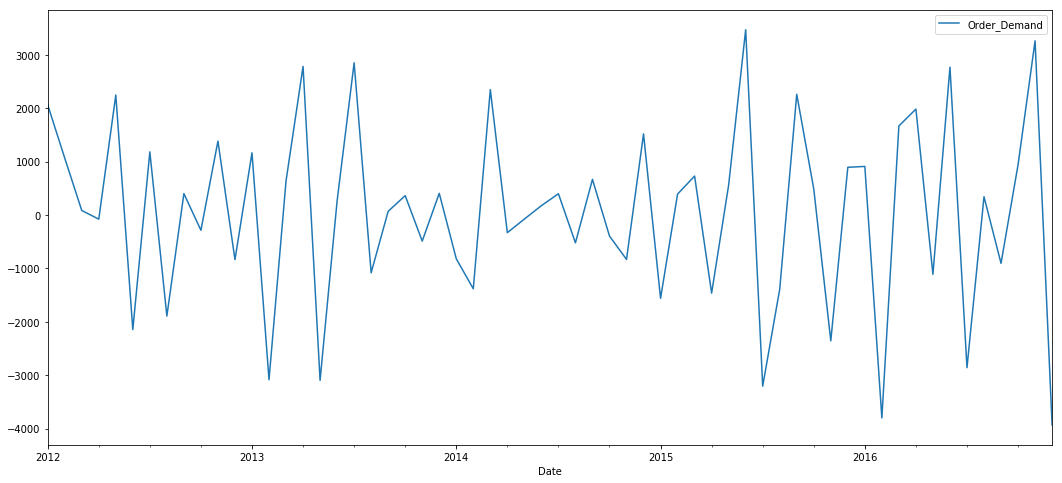

In [341]:
xx_diff.plot()

### Decomposition

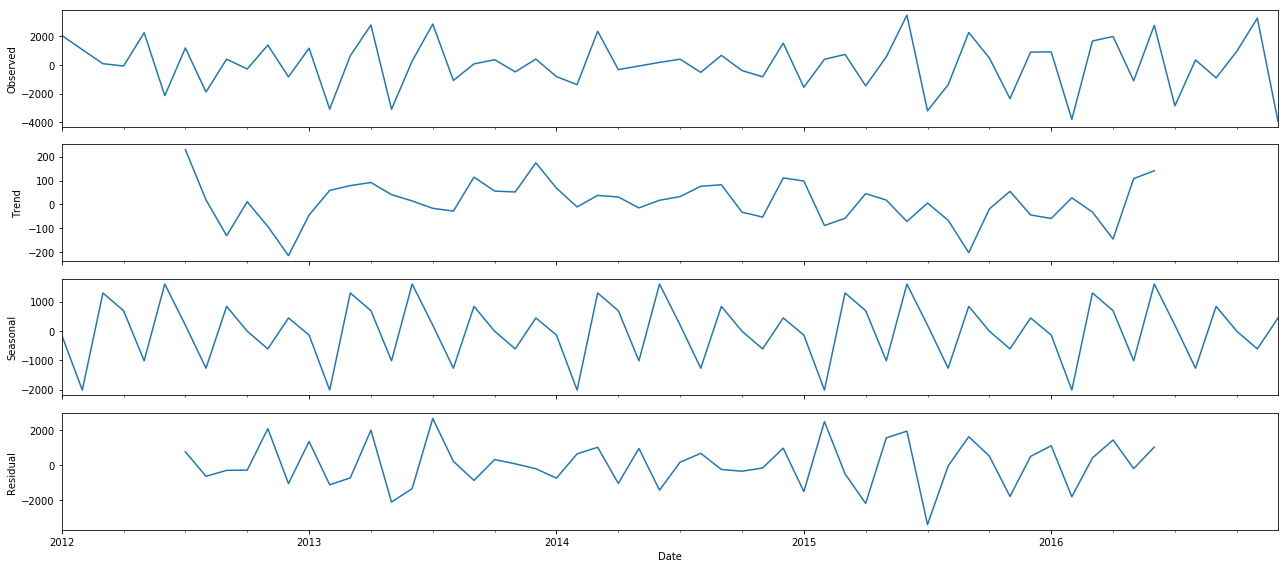

In [342]:
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(xx_diff,model='additive')
fig=decomposition.plot()


# Part 3: Forcasting methods

## Autoreggresive AR model

In [81]:
x= xx.values
x.shape

(61, 1)

In [82]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

X = xx.values
train = X[0:50]
test = X[50:]

predictions = []


In [83]:
# Training the mdoel
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [84]:
predictions_ar= model_ar_fit.predict(start=50 , end=60)
error = mean_squared_error (test , predictions_ar)
print(error)

3149882.1512731593


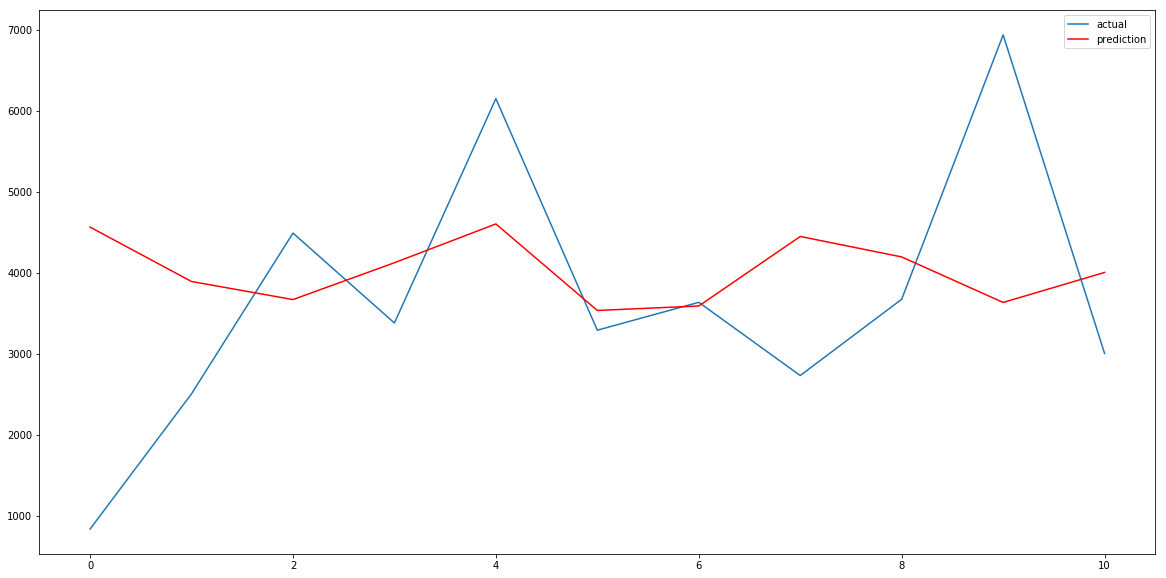

In [106]:
plt.figure(figsize=(20,10))
plt.plot(test , label='actual')
plt.plot(predictions_ar,color='red',label='prediction')
plt.legend()


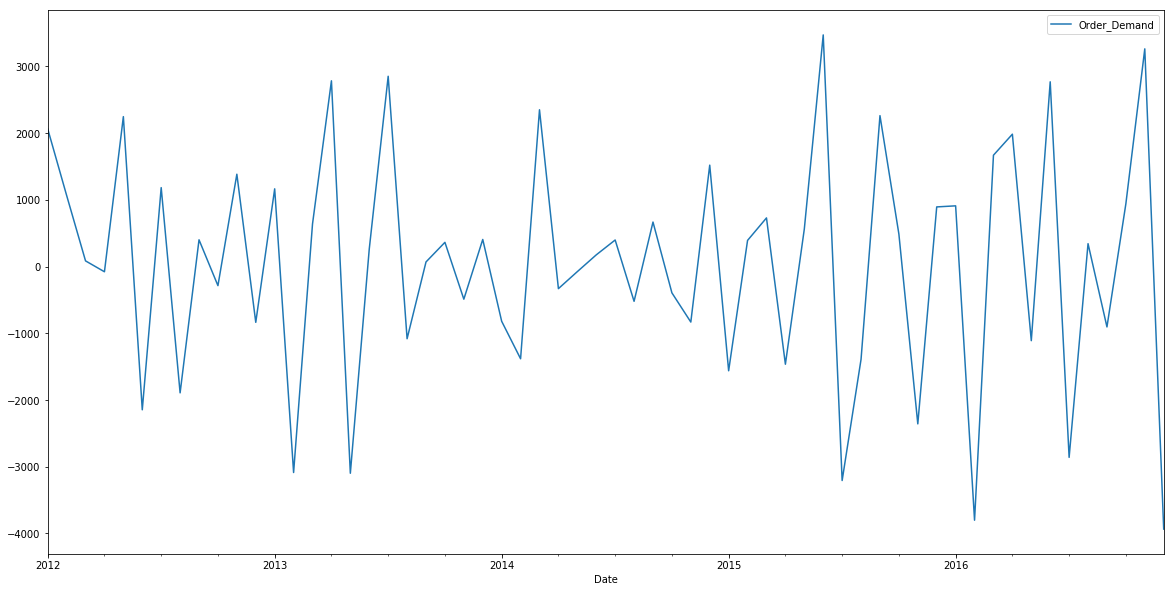

In [120]:
xx_diff.plot(figsize=(20,10))

## ARIMA model

In [122]:
from statsmodels.tsa.arima_model import ARIMA

In [123]:
import itertools
import warnings
warnings.filterwarnings('ignore')


p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
list_param=[]
for param in pdq:
    try:
        model_arima = ARIMA (train,order=param )
        model_arima_fit = model_arima.fit()
        list_param.append(model_arima_fit.aic)
        
    except:
        continue
param = min(list_param)
print(min(list_param))

828.5933322851586


In [124]:

#p,d,q  p=periods taken for autoregressive model
#        d = Integrated order, diffrence
 #       q= periods in moving average model
model_arima = ARIMA (train,order=(2,2,1) )
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)
print(model_ar_fit.aic)
print(model_arima_fit.summary())


828.7305536136918
14.084310073461612
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   48
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -409.365
Method:                       css-mle   S.D. of innovations           1143.483
Date:                Mon, 25 Nov 2019   AIC                            828.731
Time:                        12:46:03   BIC                            838.087
Sample:                             2   HQIC                           832.266
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2003      5.411     -0.961      0.342     -15.806       5.405
ar.L1.D2.y    -0.6622      0.120     -5.505      0.000      -0.898      -0.426
ar.L2.D2.y    -

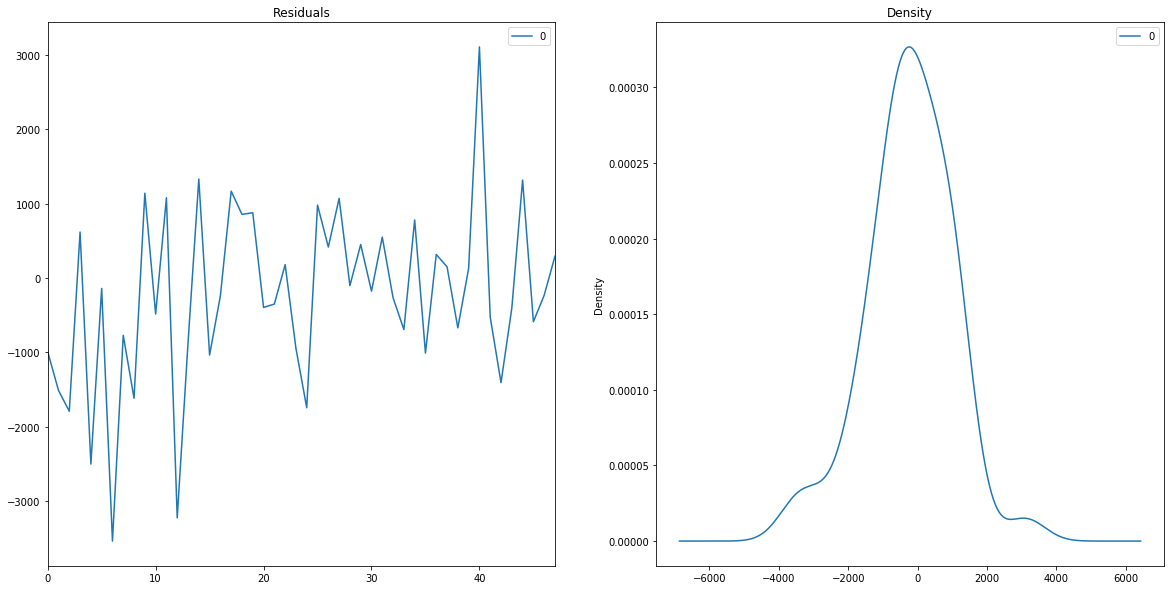

In [127]:
residuals = pd.DataFrame(model_arima_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0], figsize=(20,10))
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [128]:
predictions_arima = model_arima_fit.predict(start=50 , end=60)
error = mean_squared_error (test , predictions_arima)
print(error)

16758350.596207391


In [129]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(predictions_arima,test)

{'mape': 1.0476519253733743,
 'me': -3790.9867718216187,
 'mae': 3801.0894619818528,
 'mpe': -1.035538388010983,
 'rmse': 4214.044953578411}

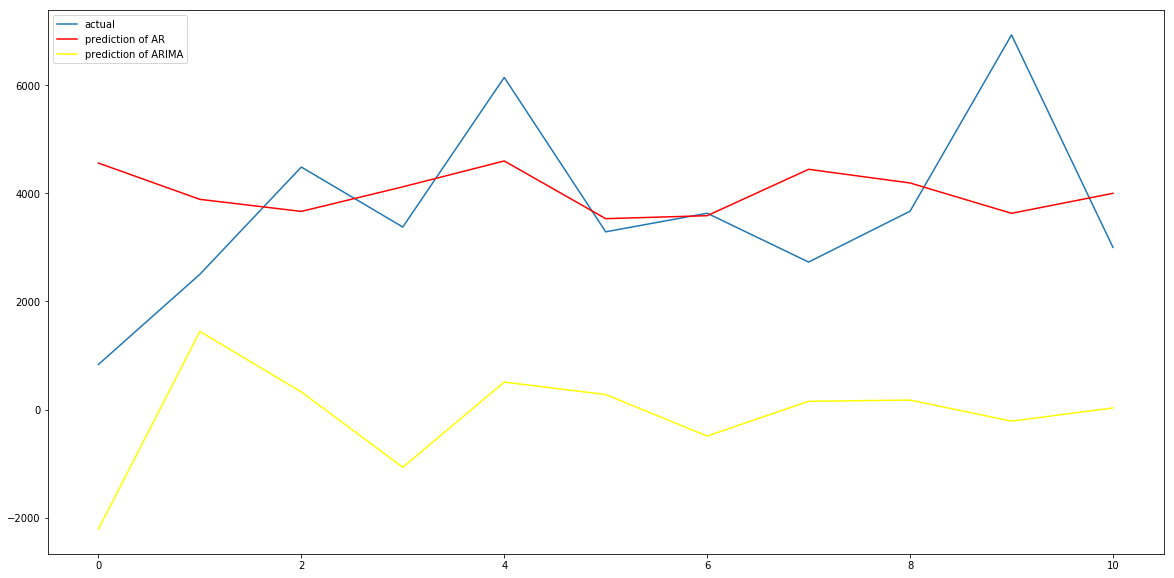

In [134]:
plt.figure(figsize=(20,10))
plt.plot(test, label='actual')
plt.plot(predictions_ar,color='red',label='prediction of AR')
plt.plot(predictions_arima,color='yellow', label='prediction of ARIMA')
plt.legend()

## SARIMA

In [135]:
X_train = xx_diff.iloc[0:50,:]
X_test = xx_diff.iloc[50:,:]

In [136]:
xx.tail(20)

,Order_Demand
Date,
2015-05-31,3557.0
2015-06-30,7030.0
2015-07-31,3824.0
2015-08-31,2435.0
2015-09-30,4698.0
2015-10-31,5186.0
2015-11-30,2829.0
2015-12-31,3724.0
2016-01-31,4635.0


4934309.293952265


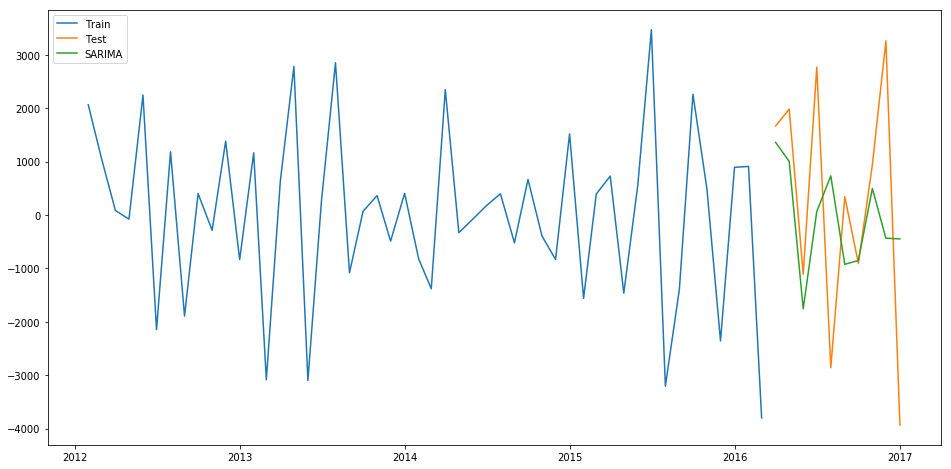

In [137]:
model_sarima_test = X_test.copy()


model_sarima =sm.tsa.statespace.SARIMAX(X_train, order=(2, 1, 1),seasonal_order=(0,1,1,7)).fit()
model_sarima_test['SARIMA'] = model_sarima.predict(Start="2016-04-30",end="2016-12-31")

plt.figure(figsize=(16,8))
plt.plot( X_train['Order_Demand'], label='Train')
plt.plot(X_test['Order_Demand'], label='Test')
plt.plot(model_sarima_test['SARIMA'], label='SARIMA')
plt.legend(loc='best')
error = mean_squared_error (X_test , model_sarima_test['SARIMA'])
print(error)

In [138]:
print(model_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6340      0.164     -3.858      0.000      -0.956      -0.312
ar.L2         -0.6256      0.140     -4.474      0.000      -0.900      -0.352
ma.L1         -0.9978     11.347     -0.088      0.930     -23.238      21.243
ma.S.L7       -0.9973     11.194     -0.089      0.929     -22.937      20.942
sigma2      1.504e+06   5.95e-06   2.53e+11      0.000     1.5e+06     1.5e+06


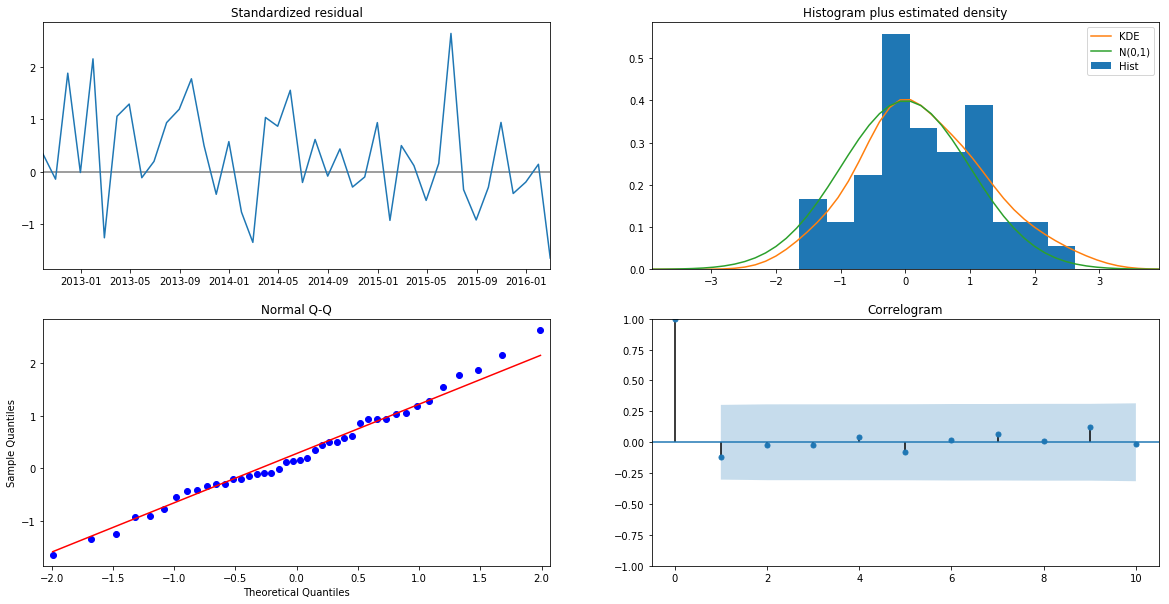

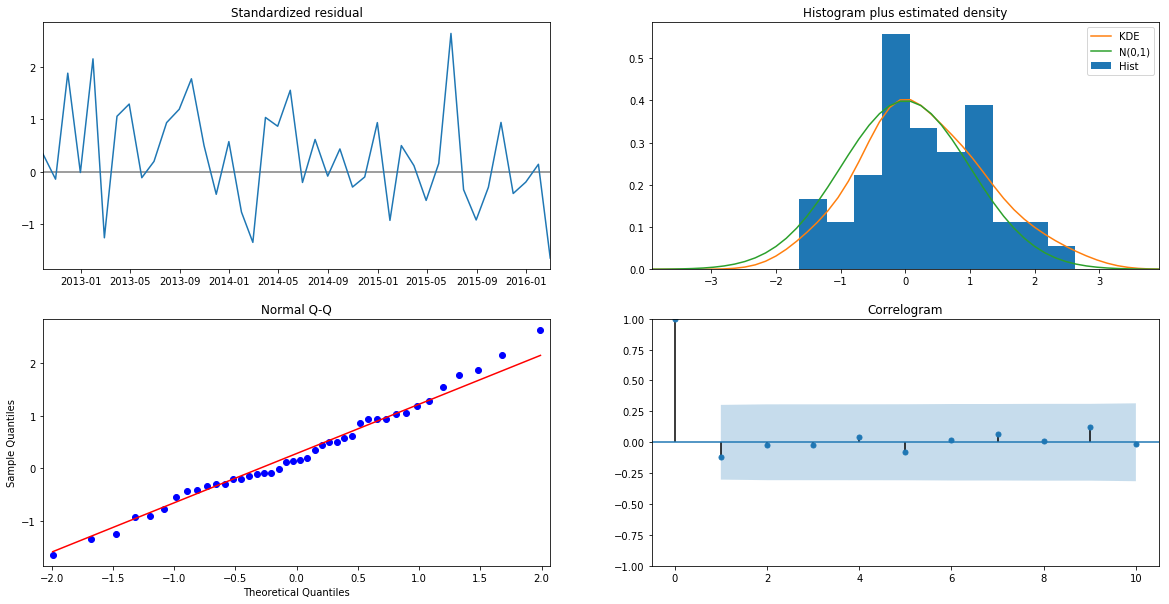

In [140]:
model_sarima.plot_diagnostics(figsize=(20,10))

## Holt-Winter’s Seasonal smoothing

In [455]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

smooth_test = X_test.copy()
smooth_train = ExponentialSmoothing(np.asarray(X_train['Order_Demand']), trend="add", seasonal="add", seasonal_periods=12,damped=True).fit()
smooth_test['Holt_Winter'] = smooth_train.forecast(steps=len(X_test))
# smooth_test = pd.DataFrame(smooth_test).set_index(smooth_test.index)
smooth_test

,Order_Demand,Holt_Winter
Date,,
2016-03-31,1670.0,898.993227
2016-04-30,1985.0,-927.252688
2016-05-31,-1110.0,98.134049
2016-06-30,2770.0,2035.127085
2016-07-31,-2859.0,-1883.256968
2016-08-31,344.0,-1279.214782
2016-09-30,-904.0,1517.408698
2016-10-31,942.0,71.440221
2016-11-30,3264.0,-1838.848433


In [485]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(X_train['Order_Demand']), trend="add", seasonal="add", seasonal_periods=12)
model2 = ExponentialSmoothing(np.asarray(X_train['Order_Demand']), trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.predict(start=50 , end=59)
fit2 = model2.fit()
pred2 = fit2.forecast(10)

sse1 = np.sqrt(np.mean(np.square(X_test['Order_Demand'].values - pred)))
sse2 = np.sqrt(np.mean(np.square(X_test['Order_Demand'].values - pred2)))

print(sse1)
print(sse2)

# fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(X_train[50:], train.values[50:]);
# ax.plot(test.index, test.values, label='truth');
# ax.plot(test.index, pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic));
# ax.plot(test.index, pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
# ax.legend();
# ax.set_title("Holt-Winter's Seasonal Smoothing");

2647.492523652748
2642.7014591962447


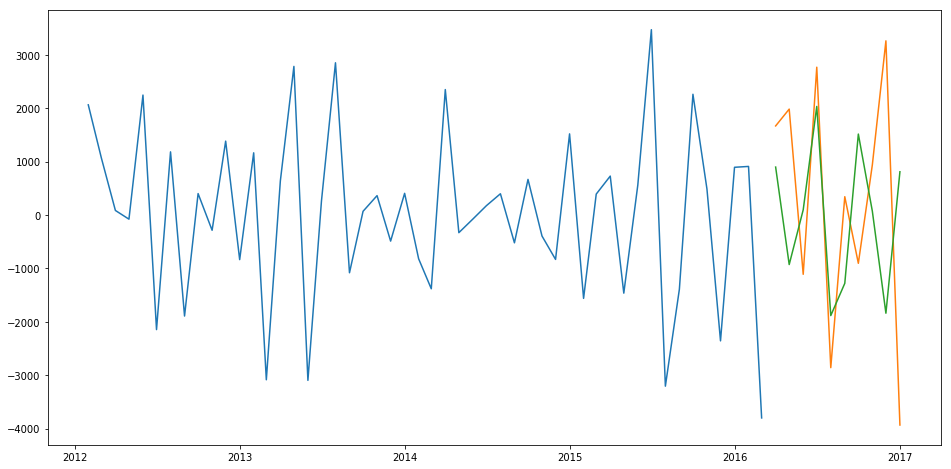

In [486]:
plt.figure(figsize=(16,8))
plt.plot( X_train['Order_Demand'], label='Train')
plt.plot(X_test['Order_Demand'], label='Test')
# plt.plot(xx['Order_Demand'], label='actual')
plt.plot(smooth_test['Holt_Winter'], label='Holt_Winter')

